# Python Lab 02a: Principal Component Analysis e Riduzione di Dimensionalità
## Francesco Della Santa, Matematica per l'Intelligenza Artificiale, Politecnico di Torino

In questa esercitazione andremo ad applicare la _Principal Component Analysis_ (PCA) su un paio di dataset giocattolo.  
In particoalare impareremo ad utilizzare la callse PCA del pacchetto [_scikit-learn_](https://scikit-learn.org/stable/#).

## Ripasso Teoria PCA

Di seguito riportiamo in breve i punti salienti riguardo la PCA.

**ATTENZIONE:** Questi appunti hanno il solo scopo di riepilogare le operazioni eseguite dai codici e permetterne un'interpretazione. Per lo studio della teoria si rimanda alle lezioni del corso ed ai libri di testo di riferimento!

**ATTENZIONE:** Utilizzeremo la notazione tipica delle implementazioni pratiche. Questa notazione rappresenta i dataset come matrici dove i dati sono le righe della matrice (i dati sono quindi _vettori riga_). Questa notazione è differente da quanto fatto tipicamente in matematica, dove i vettori sono solitamente intesi come colonne. Fare quindi attenzione a questa differenza.

### Matrici di Covarianza e di Correlazione

Sia dato un insieme di $N\in\mathbb{N}$ vettori in $\mathbb{R}^n$
$$\mathcal{X} = \{\boldsymbol{x}^{(1)},\ldots ,\boldsymbol{x}^{(N)}\}\subset\mathbb{R}^n$$
e sia $X\in\mathbb{R}^{N\times n}$ la sua rappresentazione matriciale, cioè
$$X = 
\begin{bmatrix}
\boldsymbol{x}^{(1) T}\\
\vdots\\
\boldsymbol{x}^{(N) T}
\end{bmatrix}
$$

Siano $\boldsymbol{\mu},\boldsymbol{\sigma}\in\mathbb{R}^n$ i vettori costituiti rispettivamente dalle medie e dalle deviazioni standard _campionarie_ delle colonne di $X$, cioè
$$\boldsymbol{\mu} = \frac{1}{N}\sum_{i=1}^N\boldsymbol{x}^{(i)} \quad \text{e} \quad 
\boldsymbol{\sigma}^2 =\frac{1}{N-1}\sum_{i=1}^N((x_{1}^{(i)} - \mu_1)^2,\ldots , (x_{n}^{(i)} - \mu_n)^2)=\frac{1}{N-1}\sum_{i=1}^N(\boldsymbol{x}^{(i)} - \boldsymbol{\mu})\odot (\boldsymbol{x}^{(i)} - \boldsymbol{\mu})\,,%^2\,.
$$
dove $\odot$ è il _prodotto di Hadamard_ dato da $(A\odot B)_{ij} = A_{ij}B_{ij}$.


Possiamo allora definire due trasformazioni per i dati originari:
1. **"Centramento" (Traslazione della media in O):** sottraiamo il vettore $\boldsymbol{\mu}$ a tutti i nostri dati, ottenendo il dataset 
$$\bar{X} = 
\begin{bmatrix}
\boldsymbol{x}^{(1)T} - \boldsymbol{\mu}^T\\
\vdots\\
\boldsymbol{x}^{(N)T} - \boldsymbol{\mu}^T
\end{bmatrix}
\,;
$$
1. **"Standardizzazione" o "z-normalizzazione" (Traslazione della media in O e normalizzazione della dev. standard):** sottraiamo il vettore $\boldsymbol{\mu}$ a tutti i nostri dati e dividiamo elemento per elemento (simbolo $\div$) per il vettore $\boldsymbol{\sigma}$; otteniamo quindi il dataset 
$$\widetilde{X} = 
\begin{bmatrix}
(\boldsymbol{x}^{(1)T} - \boldsymbol{\mu}^T)\div\boldsymbol{\sigma}^T\\
\vdots\\
(\boldsymbol{x}^{(N)T} - \boldsymbol{\mu}^T)\div\boldsymbol{\sigma}^T
\end{bmatrix}
\,,
$$

Le matrici $\bar{X}$ e $\widetilde{X}$ sono particolarmente utili per calcolare velocemente le matrici di Covarianza e di Correlazione di $X$, cioè:
$${\rm Cov}(X) = \frac{1}{N-1}\bar{X}^T\bar{X}\in\mathbb{R}^{n\times n} \quad \text{e} \quad 
{\rm Corr}(X) = \frac{1}{N-1}\widetilde{X}^T\widetilde{X}\in\mathbb{R}^{n\times n}\,.$$

### La PCA in Breve

Poiché la matrice di ${\rm Cov}(X)\in\mathbb{R}^{n\times n}$ è simmetrica, essa è diagonalizzabile e con **autovalori reali e non negativi**. 

Sia quindi
$$\mathcal{V}=\{\boldsymbol{v}_1,\ldots ,\boldsymbol{v}_n\}\subset\mathbb{R}^n$$
un insieme degli autovettori di ${\rm Cov}(X)$ costituenti una **base ortonormale** di $\mathbb{R}^n$, dove gli autovettori sono indicizzati in modo che i rispettivi autovalori siano ordinati in ordine decrescente, cioè 
$$\lambda_1\geq \cdots \geq \lambda_n\geq 0\,.$$
Quindi **l'autovettore $i$-esimo indica l'$i$-esima direzione di massima varianza dei dati di $X$**. Data questa proprietà, i vettori della base $\mathcal{V}$ sono definiti **Componenti Principali** (PC) di $X$.

Come diretta conseguenza di quanto appena osservato, possiamo quindi sfruttare la base $\mathcal{V}$ per **ridurre la dimensione** di un problema **minimizzando la "perdita di informazione"** (in questo caso rappresentata dalla varianza dei dati).

#### Utilizzare ${\rm Corr}(X)$

In certi casi può essere più utile eseguire la PCA rispetto la matrice ${\rm Corr}(X)$ invece che ${\rm Cov}(X)$. Questa operazione è equivalente ad effettuare la PCA rispetto ${\rm Cov}( \widetilde{X} )$ e viceversa. Dal punto di vista pratico, **conviene quindi fare la PCA rispetto ${\rm Corr}(X)$ quando i dati hanno elementi caratterizzati da intervalli di valori molto differenti e/o valori con differenti ordini di grandezza** (p.e., altezza espressa in metri e peso epresso in kg). 

**In Breve:** è preferibile eseguire la PCA rispetto ${\rm Corr}(X)$ quando ${\rm Corr}(X)$ è più utile ad interpretare le relazioni tra features di quanto non possa fare ${\rm Cov}(X)$ (per impossibilità di capire quando un valore di covarianza è "grande/piccolo").

**ATENZIONE:** tuttavia, eseguire la PCA ripetto la matrice ${\rm Corr}(X)$ comporta una distribuzione più "liscia" delle varianza tra le PC (vedere i plot negli esercizi in seguito). È quindi importante capire quando è veramente necessario applicarla e quando no. Eventualmente si tenga conto di altre trasformazioni da poter applicare al dataset prima di effettuare la PCA (_preprocessamento dei dati_), come per esempio una normalizzazione delle features per portarle entro uno stesso range di valori. **Tuttavia in letteratura l'approccio con ${\rm Corr}(X)$ è preferito**, data la sua equivalenza con la PCA rispetto ${\rm Cov}(\widetilde{X})$.

#### PCA e Riduzione di Dimensionalità

Sia $\mathcal{V}=\{\boldsymbol{v}_1,\ldots ,\boldsymbol{v}_n\}\subset\mathbb{R}^n$ la base delle PC calcolata rispetto ${\rm Cov}(X)$. Sia $\mathcal{E}=\{\boldsymbol{e}_1,\ldots ,\boldsymbol{e}_n\}$ la base canonica di $\mathbb{R}^n$. Poiché $\mathcal{V}$ è una base _ortonormale_, abbiamo che:
1. La matrice di cambio base da $\mathcal{V}$ ad $\mathcal{E}$ è la matrice $V\in\mathbb{R}^{n\times n}$ avente per colonne i vettori $\boldsymbol{v}_1,\ldots ,\boldsymbol{v}_n$ scritti in base $\mathcal{E}$, cioè
$$V=
\begin{bmatrix}
\boldsymbol{v}_1,\ldots ,\boldsymbol{v}_n
\end{bmatrix}
\,;
$$
1. La matrice di cambio base da $\mathcal{E}$ a $\mathcal{V}$ è la matrice $V\in\mathbb{R}^{n\times n}$ avente per colonne i vettori $\boldsymbol{e}_1,\ldots ,\boldsymbol{e}_n$ scritti in base $\mathcal{V}$ ed inversa della matrice $V$. Ma essendo $\mathcal{V}$ ortonormale, abbiamo $V^{-1}=V^T$ e quindi
$$V^T=
\begin{bmatrix}
\boldsymbol{v}_1^T\\
\vdots\\
\boldsymbol{v}_n^T
\end{bmatrix}
\,.
$$

**Cambio Base con Matrici Ortogonali (Ripasso):** sia $\boldsymbol{x}\in\mathbb{R}^n$ scritto in base $\mathcal{E}$ e sia $\boldsymbol{y}\in\mathbb{R}^n$ lo stesso vettore ma scritto in base $\mathcal{V}$. Allora $\boldsymbol{y} = V^T \boldsymbol{x}$ e $\boldsymbol{x} = V\boldsymbol{y}$.

Per quanto appena introdotto sopra, e ricordando che in programmazione le matrici "conservano" i dati come righe e non come colonne, abbiamo quindi che:
$$Y = \bar{X}V\in\mathbb{R}^{N\times n} \quad \text{e} \quad \bar{X} = YV^T\,.$$


**Riduzione Dimensionalità con PCA:** sia $0<m<n$ il numero di dimensioni alle quali voglio ridurre il mio problema ed indichiamo con $V|_m\in\mathbb{R}^{n\times m}$ la sottomatrice di $V$ data dalle _prime $m$ colonne_. Per ottenere una rappresentazione di $\bar{X}$ in $m$ dimensioni sfruttando le PC, basta cambiare i dati in base $\mathcal{V}$ e proiettarli sulle prime $m$ dimensioni, cioè:
$$Y_m = \bar{X}V|_m\,.$$

**ATTENZIONE:** Dato $Y_m$, non potremo mai ricostruire esattamente $\bar{X}$, poiché "scendendo" di dimensione, abbiamo perso informazione. Avremo quindi che $Y_mV|_m^T\approx\bar{X}$. L'approssimazione diventa un'uguaglianza solamente se $m=n$.

**OSSERVAZIONE:** situazione completamente analoga se si eseguisse la PCA rispetto ${\rm Corr}(X)$.

### Scelta di $m$

Poiché ${\rm Cov}(X)$ è diagonalizzabile come una matrice ${\rm diag}(\lambda_1,\ldots ,\lambda_n)$, abbiamo che le tracce di ${\rm Cov}(X)$ e ${\rm diag}(\lambda_1,\ldots ,\lambda_n)$ sono uguali. Definiamo quindi la somma di tutti gli autovalori come *Varianza Totale* di $X$, poiché
$$\Lambda:=\sum_{i=1}^n\lambda_i = \sum_{i=1}^n ({\rm Cov}(X))_{ii} = \sum_{i=1}^n{\rm Var}(x_i)\,.$$

Fissato $m$, definiamo come _varianza spiegata_ la somma $\sum_{i=1}^m\lambda_i$ e come _percentuale di varianza spiegata_ la frazione $\sum_{i=1}^n\lambda_i / \Lambda$.

I metodi più utilizzati per scegliere il "corretto" valore di $m$ sono:
1. Scegliere il giusto compromesso tra $m$ (che si vuole minimizzare) e la percentuale di varianza spiegata (che si vuole massimizzare);
1. Guardare ai valori $\lambda_i$ ed "identificare un gomito" (metodo dello scree-plot).

Entrambi i metodi sono soggettivi ed il loro utilizzo dipende da applicazione ad applicazione.


### Interpretazione dei Dati Trasformati

Nel caso in cui $m$ sia minore o uguale a 3, possiamo dare un'interpretazione ed un "signifcato" alle PC attraverso le seguenti rappresentazioni grafiche:
1. **Score graph:** scatter plot dei dati $Y_m$ (cioè le righe) in $\mathbb{R}^m$;      
1. **Loading graph:** proiezione in $\mathbb{R}^m$, rispetto alla base $\mathcal{V}$ delle PC, dei vettori della base canonica $\mathcal{E}$. In poche parole, visualizzazione in $\mathbb{R}^m$ delle righe di $V|_m$;  
1. **Biplot:** sovrapposizione di score graph e loading graph.  
    
<img src="./Honey_scores.png" width="480">

<img src="./Honey_loadings.png" width="480">

<img src="./Honey_biplot.png" width="480">


**N.B.:** se $m>3$ ovviamente non possiamo e ettuare una visualizzazione completa di $\mathbb{R}^m$. Possiamo tuttavia e ettuare molteplici visualizzazioni per diverse combinazioni di 1-3 PC delle $m$ a disposizione.


#### Interpretare le PC in Base ai Contributi delle Features Originali

Per i casi $m > 3$, il loading graph (e di conseguenza il biplot) tende a perdere di interpretabilità, data l'impossibilità di rappresentare più di 3
PC alla volta. In questi casi, una buona alternativa per l'interpretazione dei nuovi dati $Y_m$ consiste nell'analizzare i contributi che le $n$ features originali danno alle $m$ PC, leggendo cioè le PC come combinazione lineare delle features originali.

**Esempio.** Per semplicità consideriamo $m = n = 3$ e consideriamo un esempio dove le features originali $\boldsymbol{e}_1,\boldsymbol{e}_2,\boldsymbol{e}_3$ rappresentino dei valori associati a bande spettrali della luce.

<img src="./landsatV1.png" width="360"><img src="./landsatV2.png" width="360"><img src="./landsatV3.png" width="360">

Sia $\boldsymbol{y}=(y_1,y_2,y_3)$ un vettore rappresentato in base $\mathcal{V}$ (cioè $y_i$ è il coefficiente rispetto il vettore $\boldsymbol{v}_i$). Allora dai coefficienti $y_i$ possiamo "intuire" i valori delle features originali senza calcolare esplicitamente $\boldsymbol{y}$ in base $\mathcal{E}$. Nell'esempio riportato sopra osserviamo infatti che:
1. valori positivi/negativi di $y_1$ comportano un incremento/decremento di tutti le bande luminose assieme $\Rightarrow$ $\boldsymbol{v}_1$ può essere interpretata (p.e.) come la nuova feature "_luminosità generale_";
1. valori positivi di $y_2$ comportano un decremento di vis. blue e near infrared ed un incremento del mid-infrared (viceversa se $y_2$ neg.) $\Rightarrow$ $\boldsymbol{v}_2$ può essere interpretata (p.e.) come la nuova feature "($-$)_vis. blue & near infrared VS ($+$) mid-infrared_";
1. valori positivi di $y_3$ comportano un incremento di vis. blue ed un decremento del near infrared (viceversa se $y_3$ neg.) $\Rightarrow$ $\boldsymbol{v}_3$ può essere interpretata (p.e.) come la nuova feature "_($-$) near infrared VS ($+$) vis. blue_";

**OSSERVAZIONE:** le componenti nelle PC sono un indicatore del livello di correlazione/anticorrelazione tra le features lungo la direzione indicata dalla PC in $\mathbb{R}^n$. Inoltre, per l'ortonormalità di $V$, il valore della componente $i$-esima della  $j$-esima PC equivale alla $j$-esima coordinata della proiezione di $\boldsymbol{e}_i$ nel piano delle PC (vedi _loading graph_).

## PCA con Scikit-Learn

In scikit-learn (da ora in poi "_sklearn_") esiste una specifica classe (documentazione ufficiale [qui](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) per creare degli "oggetti PCA": _sklearn.decomposition.PCA_

**ATTENZIONE:** la PCA di sklearn esegue l'operazione sempre rispetto la matrice ${\rm Cov}(X)$.

Gli argomenti principali per l'inizializzazione di oggetti PCA sono:

1. **n\_components:** numero $m$ di PC da considerare (scartando le restanti $n-m$). Questo argomento può essere assegnato in più modi.
    - **None (default):** tutte le PC vengono conservate ($m = n$);
    - **numero intero m:** il numero intero indica il numero di PC da conservare, quindi deve essere $0 < m\leq \min (N, n)$. Se il solver per il calcolo delle PC tramite SVD  e \arpack" (vedi punto 2), allora si deve scegliere $0 < m < \min(N, n)$.
    - **float tra 0 e 1 esclusi:** vengono conservate le prime m PC tale che la percentuale di varianza totale spiegata sia maggiore o uguale a quanto indicato, con il numero minimo possibile di PC. Questa opzione è ammessa solamente se il solver per il calcolo delle PC tramite SVD è "full" (vedi punto 2).
1. **svd\_solver:** tipo di solutore per il calcolo della decomposizione SVD della matrice dei dati $X$ (valore di default: 'auto'). Per maggiori dettagli, consultare la documentazione.


> **Codice Esempio:** creaiamo tre differenti oggetti PCA che siano "pronti" per eseguire le trasformazioni di dati.
> ~~~python
> from sklearn.decomposition import PCA
> pca_general = PCA() # No argomenti --> valori di default
> pca_perc = PCA(n_components=0.5, svd solver='full')
> pca_ncomp = PCA(n_components=7)
> ~~~
> 
  
  

Inizializzato un oggetto PCA, lo si può utilizzare per eseguire la PCA rispetto una matrice di dati $X\in\mathbb{R}^{N\times n}$ e trasformare un qualsiasi vettore $\boldsymbol{x}\in\mathbb{R}^n$ nella sua rappresentazione tramite $m$ PC, o viceversa.

**ATTENZIONE:** la PCA di sklearn esegue le operazioni di "cetramento/decentramento" automaticamente, cioè: $X\rightarrow\bar{X}\rightarrow Y_m$ e viceversa.

Vediamo i metodi e gli attributi caratterizzanti gli oggetti della classe PCA (inizializzati). Vedremo i metodi **fit**, **transform** ed **inverse\_transform** con funzione analoga a quelli della classe LabelEncoder.

1. **fit**($X$): Data la matrice $X\in\mathbb{R}^{N\times n}$ questo metodo calcola la matrice $V|_m$ delle PC (in base ai parametri di inizializzazione), aggiornando i seguenti attributi dell'oggetto.
    - **n\_features:** attributo che conserva il numero $n$ di features iniziali.
    - **mean_**: attributo che conserva il vettore delle medie $\boldsymbol{\mu}$ di $X$ come un 1D-array di numpy.
    - **n\_samples:** attributo che conserva il valore $N$ di dati costituenti $X$.
    - **n\_components:** attributo che conserva il valore $m$ di PC scelte.
    - **components\_:** attributo che conserva la matrice $V|_m^T$ (numpy 2D-array). **N.B.:** le righe sono le prime $m$ PC.
    - **explained\_variance\_:** attributo che conserva un vettore $\boldsymbol{\lambda}=[\lambda_1, \ldots ,\lambda_m]$ (1D-array) contenente gli autovalori delle PC.
    - **explained_variance\_ratio\_:** attributo che conserva il vettore $\boldsymbol{\lambda}/\Lambda$ (1D-array) delle percentuali di varianza spiegata per ogni autovalore.
1. **transform**($X'$): Questo metodo trasforma una qualsiasi matrice $X'\in\mathbb{R}^{K\times n}$ nella sua rappresentazione rispetto le $m$ PC scelte. **N.B.:** il metodo effettua automaticamente il centramento dei dati!
1. **inverse\_transform**($Y'$): Metodo inverso al precedente. Data una matrice $Y'\in\mathbb{R}^{K\times m}$, calcola l'approssimazione di $X'$ (o esattamente $X'$ se $m=n$). **N.B.:** il metodo effettua automaticamente il decentramento dei dati!

> **Codice Esempio:**
> ~~~python
> from sklearn.decomposition import PCA
> import numpy as np
> N, n, m = 1000, 100, 7
> X = np.random.rand(N, n)
> pca = PCA(n_components=m)
> # Preparazione oggetto PCA
> pca.fit(X)
> # Rappresentazione X rispetto le prime m PC
> Ym = pca.trasnform(X)
> # Approssimazione X da Ym con trasformazione inversa
> Xapp = pca.inverse_transform(Ym)
> ~~~
> 

### Standard Scaler e PCA Rispetto ${\rm Corr}(X)$

Poiché la PCA di sklearn esegue la PCA solamente rispetto ${\rm Cov}(X)$, per eseguire la PCA rispetto ${\rm Corr}(X)$ basta eseguire quella rispetto i dati standardizzati. Per calcolare $\widetilde{X}$ utilizziamo quindi la classe _skleran.preprocessing.StandardScaler_ di sklearn (documentazione completa [qui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)).

I metodi principali dello StandardScaler sono sempre **fit**, **transform** ed **inverse\_transform**. Il primo metodo serve per calcolare e conservare come attributi i vettori $\boldsymbol{\mu},\boldsymbol{\sigma}$ della matrice $X$ fornita in input (cioè usata come riferimento per centramento e standardizzazione). Gli altri due eseguono rispettivamente le trasformazioni di "centramento + standardizzazione" e "decentramemto + de-standardizzazione".

**N.B.:** StandardScaler può effettuare anche una sola delle due operazioni. Per maggiori dettagli, guardare la documentazione.

> **Codice Esempio:** utilizo StandardScaler
> ~~~python
> from sklearn.preprocessing import StandardScaler
> import numpy as np
> N, n = 1000, 100
> X = np.random.rand(N, n)
> X1 = np.random.rand(10, n)
> Y1hat = np.random.rand(10, n)
> scaler = StandardScaler()
> # Preparazione ed utilizzo oggetto StandardScaler risp. X
> scaler.fit(X)
> Xhat = scaler.transform(X) # centr.+stand.
> X1hat = scaler.transform(X1) # centr.+stand.
> Y1 = scaler.inverse_transform(Y1hat) # de-centr.+de-stand.
> ~~~
> 

> **Codice Esempio:** utilizo StandardScaler e PCA
> ~~~python
> from sklearn.decomposition import PCA
> from sklearn.preprocessing import StandardScaler
> import numpy as np
> N, n, m = 1000, 100, 7
> X = np.random.rand(N, n)
> pca = PCA(n_components=m)
> scaler = StandardScaler()
> scaler.fit(X)
> pca.fit(scaler.transform(X))
> Ym = pca.transform(scaler.transform(X))
> Xapp = scaler.inverse_transform(pca.inverse_transform(Ym))
> ~~~
> 

## PCA - Esempi di applicazione

In [1]:
# ***** NOTA BENE PER UTILIZZI IN ALTRI PROGETTI! *****
# perché %matplotlib widget funzioni, serve il pacchetto ipympl che abbiamo installato nell'ambiente virtuale
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
%matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

### Importazione di due datasets messi a disposizione da Scikit-Learn

Guardare https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets per maggiori informazioni sui datasets "giocattolo" messi a disposizione da Scikit-Learn.

Noi lavoreremo con il dataset "iris" ed il dataset "wine".

**Compito per lo studente:** guardare la documentazione di *datasets.load_iris* e *datasets.load_wine* (link sopra indicato) per capirne il contenuto.

In [2]:
iris_dataset = datasets.load_iris(as_frame=True)
wine_dataset = datasets.load_wine(as_frame=True)

iris = pd.concat([iris_dataset['data'], iris_dataset['target']], axis=1)
wine = pd.concat([wine_dataset['data'], wine_dataset['target']], axis=1)

display(iris)
print(iris_dataset['DESCR'])
display(wine)
print(wine_dataset['DESCR'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

#### Osservazioni:
1. Il dataset degli iris vede le feature dei fiori espresse tutte in cm e con range di valori tutti dello stesso ordine di grandezza
2. Il dataset dei vini vede features di vario tipo, espresse con unità di misura differenti e range di valori di ordine di grandezza differenti.

**Conseguenze:** 
1. Per gli iris possiamo usare la PCA "normale";
2. Per i vini non possiamo usare la PCA "normale", altrimenti la maggior parte della varianza verrebbe "mangiata" dalla feature "Proline". Per questo dataset applicheremo quindi una standardizzazione dei dati, oltre che un centramento.

Mostriamo la percentuale di varianza spiegata dalle varie PC per i due dataset. Nel caso dei vini mostriamo sia il caso con che senza standardizzazione.

**N.B.:** Per questa indagine preliminare, non ridurremo la dimensionalità del problema e considereremo quindi tutte le PC.

/home/fdellasanta/miniconda3/envs/tfenv_pylabs/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


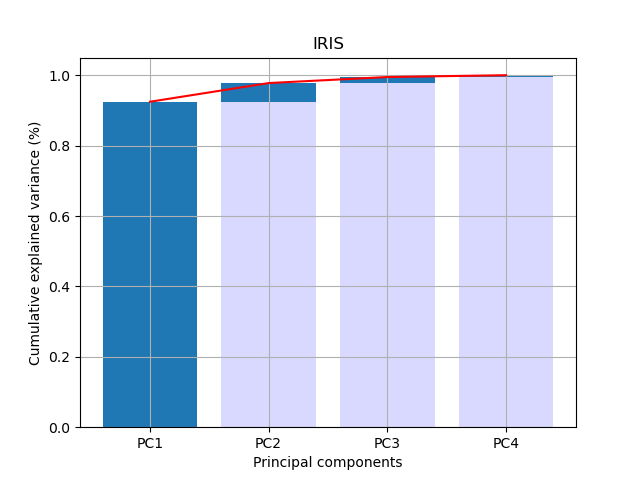

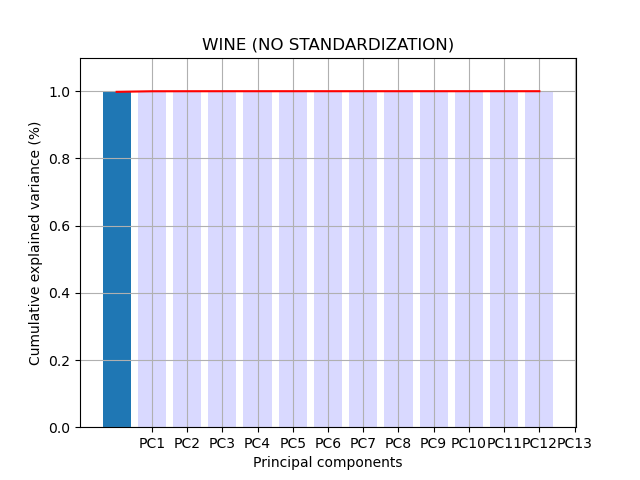

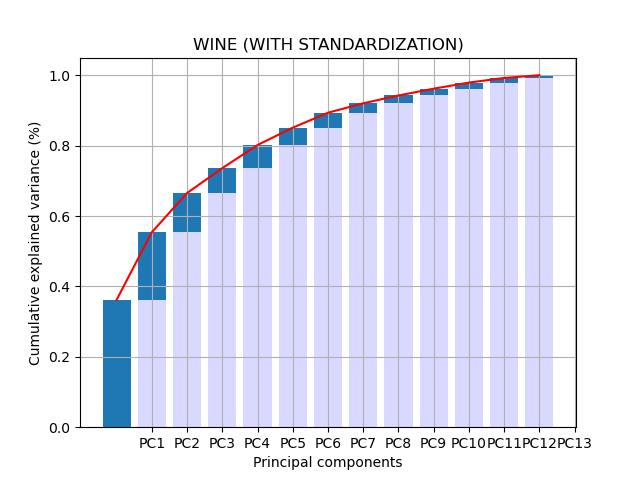

In [3]:
X_iris = iris.iloc[:, :-1]  # Escludo l'ultima colonna dei target
X_wine = wine.iloc[:, :-1]  # Escludo l'ultima colonna dei target

scaler_wine = StandardScaler()
scaler_wine.fit(X_wine.values)

X_wine_scaled = scaler_wine.transform(X_wine.values)

pca_iris = PCA()
pca_wine = PCA()
pca_wine_nostd = PCA()

pca_iris.fit(X_iris.values)
pca_wine.fit(X_wine_scaled)
pca_wine_nostd.fit(X_wine.values)

# NOTE:
# np.cumsum: funzione numpy che esegue la somma cumulative del vettore in argomento
# np.insert: permette di inserire un valore in un vettore alla posizione specificata
#
# COMPITO PER LO STUDENTE: guardare la documentazione numpy per comprendere il 
# funzionamento delle funzioni sopra indicate e delle funzioni di matplotlib usate 
# nel seguito.

plt.figure()
plt.bar(np.arange(pca_iris.n_features_), pca_iris.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_iris.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_iris.n_features_), np.insert(np.cumsum(pca_iris.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_iris.explained_variance_ratio_), 'r')
plt.title('IRIS')
plt.xticks(ticks=np.arange(pca_iris.n_features_), 
           labels=[f'PC{i}' for i in range(1, pca_iris.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_wine_nostd.n_features_), pca_wine_nostd.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_wine_nostd.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_wine_nostd.n_features_), np.insert(np.cumsum(pca_wine_nostd.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_wine_nostd.explained_variance_ratio_), 'r')
plt.title('WINE (NO STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_wine_nostd.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_wine_nostd.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.ylim([0, 1.1])
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_wine.n_features_), pca_wine.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_wine.explained_variance_ratio_), 0, 0)[:-1])
plt.bar(np.arange(pca_wine.n_features_), np.insert(np.cumsum(pca_wine.explained_variance_ratio_), 0, 0)[:-1], color='b', alpha=0.15)
plt.plot(np.cumsum(pca_wine.explained_variance_ratio_), 'r')
plt.title('WINE (WITH STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_wine.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_wine.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()


### Scree Plot

Supponendo di voler invece scegliare le PC rispetto la "regola del gomito", visualizziamo i cosiddetti _Scree plot_.

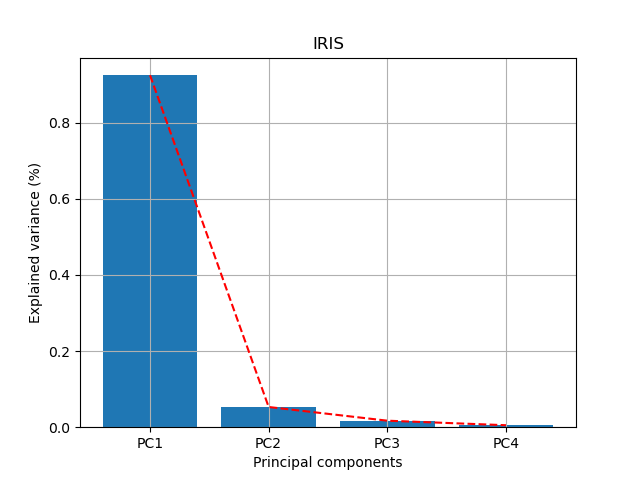

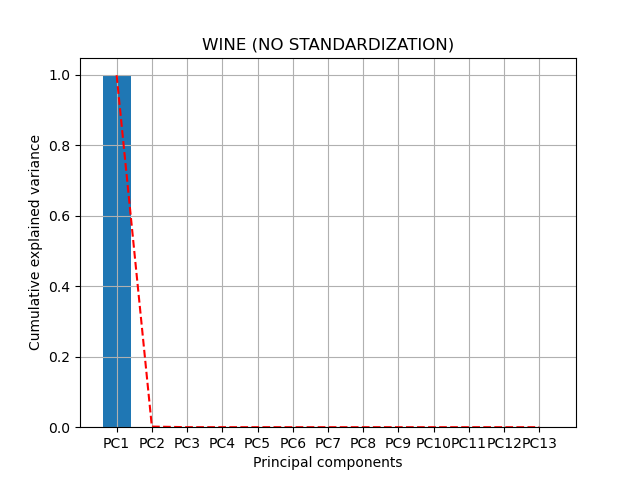

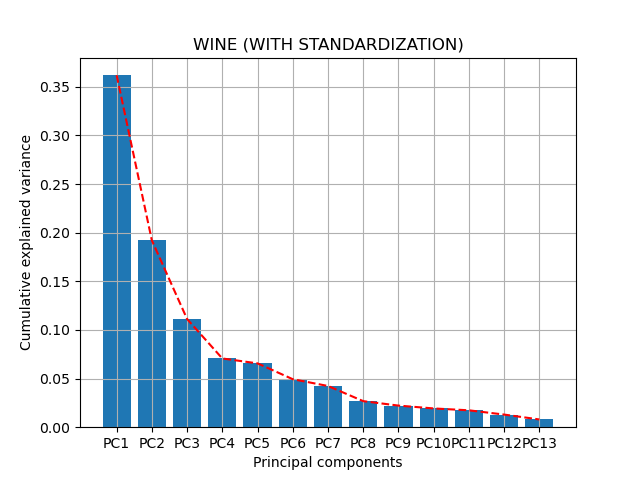

In [4]:
plt.figure()
plt.bar(np.arange(pca_iris.n_features_), pca_iris.explained_variance_ratio_)
plt.plot(np.arange(pca_iris.n_features_), pca_iris.explained_variance_ratio_, 'r--')
plt.title('IRIS')
plt.xticks(ticks=np.arange(pca_iris.n_features_), 
           labels=[f'PC{i}' for i in range(1, pca_iris.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Explained variance (%)')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_wine_nostd.n_features_), pca_wine_nostd.explained_variance_ratio_)
plt.plot(np.arange(pca_wine_nostd.n_features_), pca_wine_nostd.explained_variance_ratio_, 'r--')
plt.title('WINE (NO STANDARDIZATION)')
plt.xticks(ticks=np.arange(pca_wine_nostd.n_features_), 
           labels=[f'PC{i}' for i in range(1, pca_wine_nostd.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_wine.n_features_), pca_wine.explained_variance_ratio_)
plt.plot(np.arange(pca_wine.n_features_), pca_wine.explained_variance_ratio_, 'r--')
plt.title('WINE (WITH STANDARDIZATION)')
plt.xticks(ticks=np.arange(pca_wine.n_features_), 
           labels=[f'PC{i}' for i in range(1, pca_wine.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

### Visualizzazioni

Per le visualizzazioni, per esercizio sceglieremo m=2 PC per gli iris e m=3 PC per wine. Si osserva tuttavia che la varianza spiegata è molto alta per gli iris (quasi 100%) e "accettabile" per wine (quasi 70%).

In [5]:
pca_iris_m = PCA(n_components=2)
pca_wine_m = PCA(n_components=3)

pca_iris_m.fit(X_iris.values)
pca_wine_m.fit(X_wine_scaled)

Y_iris_m = pca_iris_m.transform(X_iris.values)
Y_wine_m = pca_wine_m.transform(X_wine_scaled)

### Score Graph

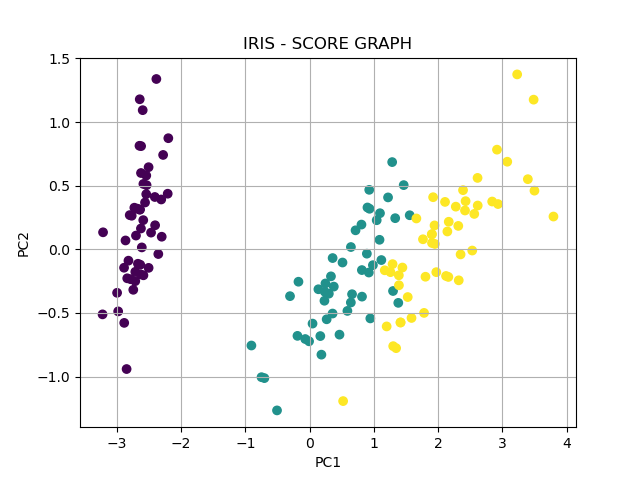

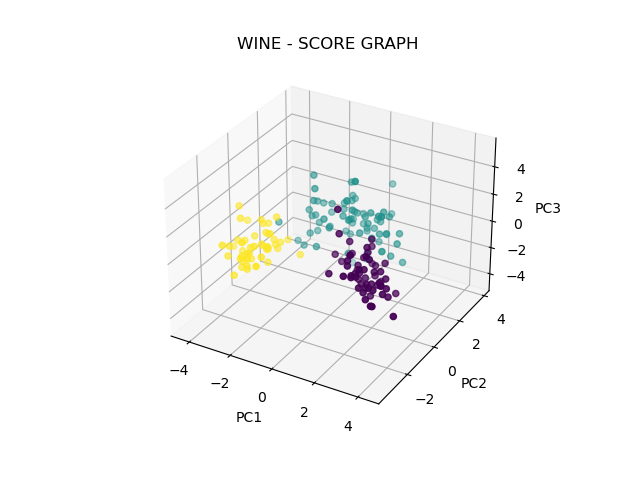

In [6]:
plt.figure()
plt.scatter(Y_iris_m[:, 0], Y_iris_m[:, 1], c=iris['target'].values)
plt.title('IRIS - SCORE GRAPH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# NOTA: per i plot 3D, importare sempre Axes3D, cioè eseguire prima il 
# comando "from mpl_toolkits.mplot3d import Axes3D".
# Per ulteriori informazioni su plot 3D, consultare la documentazione di Matplotlib

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
ax.scatter(Y_wine_m[:, 0], Y_wine_m[:, 1], Y_wine_m[:, 2], c=wine['target'].values)
plt.title('WINE - SCORE GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

### Loading Graph

/home/fdellasanta/miniconda3/envs/tfenv_pylabs/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


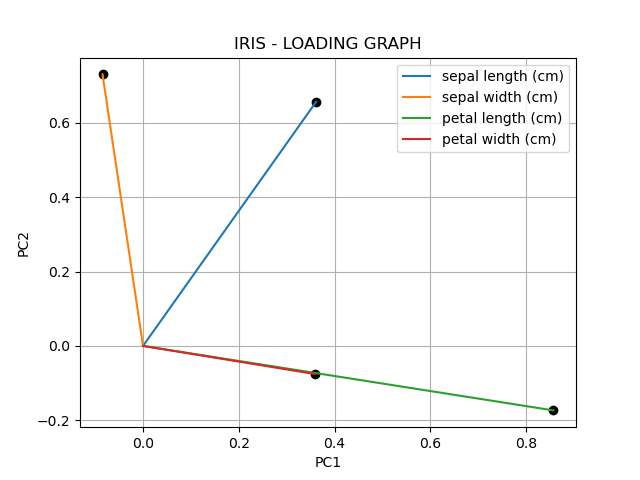

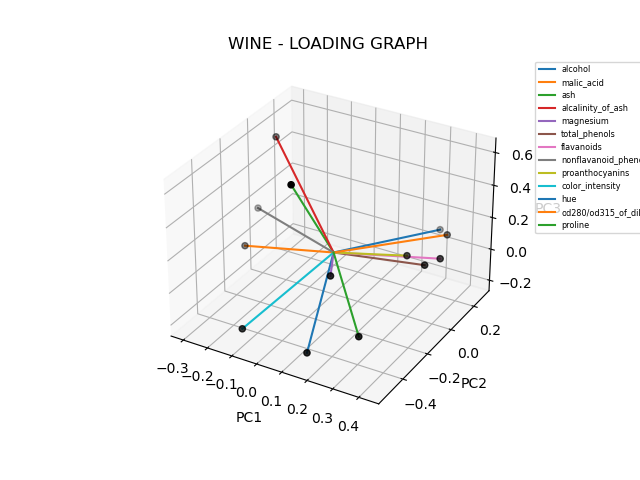

In [7]:
plt.figure()
for i in range(pca_iris_m.n_features_):
    plt.plot([0, pca_iris_m.components_[0, i]], [0, pca_iris_m.components_[1, i]], 
             label=X_iris.columns[i])
plt.scatter(pca_iris_m.components_[0, :], pca_iris_m.components_[1, :], c='k')
plt.legend()
plt.title('IRIS - LOADING GRAPH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# NOTA: per i plot 3D, importare sempre Axes3D, cioè eseguire prima il 
# comando "from mpl_toolkits.mplot3d import Axes3D".
# Per ulteriori informazioni su plot 3D, consultare la documentazione di Matplotlib

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
for i in range(pca_wine_m.n_features_):
    ax.plot([0, pca_wine_m.components_[0, i]], [0, pca_wine_m.components_[1, i]], 
            [0, pca_wine_m.components_[2, i]],
             label=X_wine.columns[i])
ax.scatter(pca_wine_m.components_[0, :], pca_wine_m.components_[1, :], pca_wine_m.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('WINE - LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()


#### Biplot

**Compito per lo studente:** combinare i codici degli score e loading graphs per rappresentare i biplot.

In [8]:
# ...

### Interpretazione delle PC

Vediamo il contributo delle features originali per le PC, aiutandoci con dei barplot.

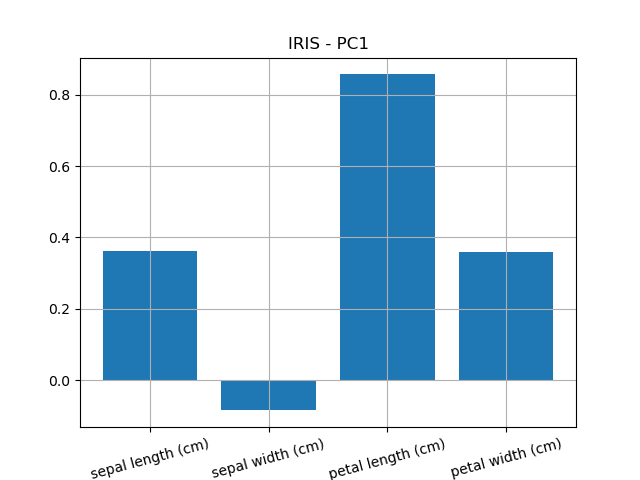

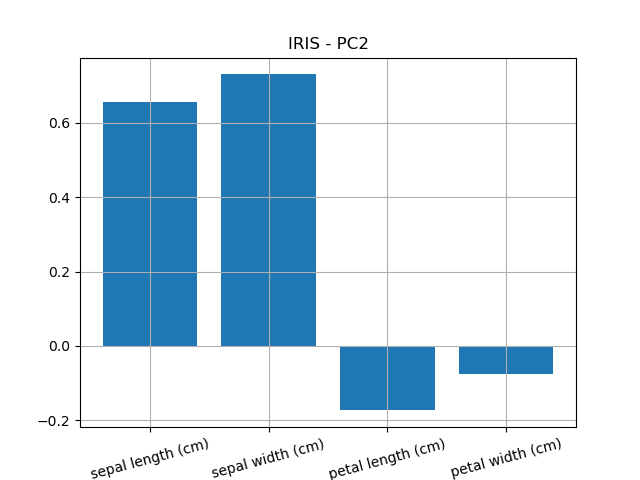

In [9]:
plt.figure()
plt.bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[0, :])
plt.xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=15)
plt.title('IRIS - PC1')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[1, :])
plt.xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=15)
plt.title('IRIS - PC2')
plt.grid()
plt.show()


**Assegnare nomi alle PC:** guardando ai barplot, potremmo (*per esempio*) assegnare alla PC1 il nome di "petal size and sepal length", mentre alla PC2 il nome di "sepal size".

**ESERCIZIO PER LO STUDENTE:** stampare i barplot delle PC corrispondenti al dataset wine e guardare se è possibile "assegnare loro un nome".

In [10]:
# ...